In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('application_record.csv')

In [5]:
data.head()

,ID,Gender,Own_car,Own_property,Number of children,Total_income,Education,Martial_status,Housing_type,Days_birth,Days_employed,Mobile,Work_phone,Phone,Email,Occupation
0,5008804,M,Y,Y,0,427500.0,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN
1,5008805,M,Y,Y,0,427500.0,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN
2,5008806,M,Y,Y,0,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff
3,5008808,F,N,Y,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff
4,5008809,F,N,Y,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff


In [6]:
data=data.drop(columns=['ID','Mobile','Work_phone','Phone','Email'],axis=1)

In [7]:
data['Days_birth']=round(-data['Days_birth']/365.2425)

In [8]:
data['Occupation'].fillna('Not Specified', inplace=True)

In [9]:
data['Days_employed']=round(-data['Days_employed']/365.2425)

In [10]:
data['Days_birth']=data['Days_birth'].astype(int)
data['Days_employed']=data['Days_employed'].astype(int)

In [11]:
data1=pd.read_csv('credit_card_approval3.csv')

In [12]:
data1.head()

,ID,Gender,Own_car,Own_properties,Number of childrens,Total_income,Education,Martial_status,Housing_type,Age,Years_employed,Mobile,Work_phone,Phone,Email,Occupation,Begin_month,Status,Target
0,5008806,M,Y,Y,No children,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,-26,X,0
1,5008806,M,Y,Y,No children,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,-15,X,0
2,5008806,M,Y,Y,No children,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,0,C,0
3,5008806,M,Y,Y,No children,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,-5,C,0
4,5008806,M,Y,Y,No children,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,-29,X,0


In [13]:
data.shape,data1.shape

((438557, 11), (537667, 19))

In [14]:
data1.drop(columns=['Status','Target','ID','Mobile','Work_phone','Phone','Email','Begin_month'], inplace=True)

In [15]:
data1['Days_birth']=round(-data1['Age']/365.2425)
data1['Days_employed']=round(-data1['Years_employed']/365.2425)

In [16]:
data1.drop(columns=['Age','Years_employed'],inplace=True)

In [17]:
data1['Days_birth']=data1['Days_birth'].astype(int)
data1['Days_employed']=data1['Days_employed'].astype(int)

In [18]:
chil_map1={'No children':0, '2+ children':3, '1 children':1}

In [19]:
data1['Number of childrens']=data1['Number of childrens'].map(chil_map1)

In [20]:
data1.rename(columns={'Own_properties':'Own_property','Number of childrens':'Number of children'},inplace=True)

In [21]:
data1_reordered = data1[data.columns]

In [22]:
data1_reordered.head(1)

,Gender,Own_car,Own_property,Number of children,Total_income,Education,Martial_status,Housing_type,Days_birth,Days_employed,Occupation
0,M,Y,Y,0,112500.0,Secondary / secondary special,Married,House / apartment,59,3,Security staff


In [23]:
new_data = pd.concat([data, data1_reordered], ignore_index=True)

In [24]:
new_data.head()

,Gender,Own_car,Own_property,Number of children,Total_income,Education,Martial_status,Housing_type,Days_birth,Days_employed,Occupation
0,M,Y,Y,0,427500.0,Higher education,Civil marriage,Rented apartment,33,12,Not Specified
1,M,Y,Y,0,427500.0,Higher education,Civil marriage,Rented apartment,33,12,Not Specified
2,M,Y,Y,0,112500.0,Secondary / secondary special,Married,House / apartment,59,3,Security staff
3,F,N,Y,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,52,8,Sales staff
4,F,N,Y,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,52,8,Sales staff


In [25]:
new_data['Total_income']=new_data['Total_income'].astype(int)

In [26]:
new_data['Occupation'].unique()

array(['Not Specified', 'Security staff', 'Sales staff', 'Accountants',
       'Laborers', 'Managers', 'Drivers', 'Core staff',
       'High skill tech staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Low-skill Laborers', 'Medicine staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents',
       'IT staff'], dtype=object)

In [27]:
import pandas as pd

def categorize_job(job):
    professional_jobs = ['Accountants', 'Managers', 'High skill tech staff', 'Medicine staff',
                         'Secretaries', 'HR staff', 'Realty agents', 'IT staff']
    
    skilled_jobs = ['Security staff', 'Sales staff', 'Core staff', 'Cleaning staff',
                    'Private service staff', 'Cooking staff', 'Waiters/barmen staff', 'Drivers']
    
    unskilled_jobs = ['Laborers', 'Low-skill Laborers']
    
    if job in professional_jobs:
        return 'Professional'
    elif job in skilled_jobs:
        return 'Skilled'
    elif job in unskilled_jobs:
        return 'Unskilled'
    else:
        return 'Unknown'  # For any other category not listed above

# List of jobs
jobs = ['Security staff', 'Sales staff', 'Accountants', 'Laborers',
        'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
        'Cleaning staff', 'Private service staff', 'Cooking staff',
        'Low-skill Laborers', 'Medicine staff', 'Secretaries',
        'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff']

# Apply the categorize_job function to create a new column 'Category'
new_data['Occupation'] = new_data['Occupation'].apply(categorize_job)

# Display the DataFrame
new_data.head(2)


,Gender,Own_car,Own_property,Number of children,Total_income,Education,Martial_status,Housing_type,Days_birth,Days_employed,Occupation
0,M,Y,Y,0,427500,Higher education,Civil marriage,Rented apartment,33,12,Unknown
1,M,Y,Y,0,427500,Higher education,Civil marriage,Rented apartment,33,12,Unknown


In [28]:
new_data['Occupation'].value_counts()

Occupation
Skilled         378868
Professional    247578
Unskilled       215575
Unknown         134203
Name: count, dtype: int64

In [29]:
new_data['Occupation'].unique()

array(['Unknown', 'Skilled', 'Professional', 'Unskilled'], dtype=object)

In [30]:
new_data.shape

(976224, 11)

In [31]:
new_data['Occupation'].unique()

array(['Unknown', 'Skilled', 'Professional', 'Unskilled'], dtype=object)

In [32]:
new_data.tail(2)

,Gender,Own_car,Own_property,Number of children,Total_income,Education,Martial_status,Housing_type,Days_birth,Days_employed,Occupation
976222,M,Y,N,0,202500,Secondary / secondary special,Married,House / apartment,53,6,Skilled
976223,M,Y,N,0,202500,Secondary / secondary special,Married,House / apartment,53,6,Skilled


In [33]:
import pandas as pd

# Define weights for each feature
weights = {
    'Own_car': 0.05,
    'Own_property': 0.2,
    'Total_income': 0.45,
    'Days_birth': 0.1,  # Assuming 'Age' represents age in years
    'Days_employed': 0.15
}

# Define credit limit multipliers for different occupation types
occupation_multipliers = {
    'Professional': 1.0,
    'Skilled': 0.8,
    'Unskilled': 0.5,
    'Unknown':0.2
}

# Define credit limit range
max_credit_limit = 100000  # Maximum credit limit

# Calculate credit limits for each individual
def calculate_credit_limit(row):
    score = 0
    for feature, weight in weights.items():
        if feature == 'Total_income':
            score += row[feature] * weight
        elif feature == 'Days_birth':
            score += row[feature] * weight
        elif feature == 'Days_employed':
            score += row[feature] * weight
        elif feature in ['Own_car', 'Own_property']:
            if row[feature] == 'Yes':
                score += max_credit_limit * weight
    # Multiply by occupation multiplier
    score *= occupation_multipliers[row['Occupation']]
    return score

# Apply the function to each row and create a new column 'Credit_limit'
new_data['Credit_limit'] = new_data.apply(calculate_credit_limit, axis=1)



In [34]:
new_data.head()

,Gender,Own_car,Own_property,Number of children,Total_income,Education,Martial_status,Housing_type,Days_birth,Days_employed,Occupation,Credit_limit
0,M,Y,Y,0,427500,Higher education,Civil marriage,Rented apartment,33,12,Unknown,38476.02
1,M,Y,Y,0,427500,Higher education,Civil marriage,Rented apartment,33,12,Unknown,38476.02
2,M,Y,Y,0,112500,Secondary / secondary special,Married,House / apartment,59,3,Skilled,40505.08
3,F,N,Y,0,270000,Secondary / secondary special,Single / not married,House / apartment,52,8,Skilled,97205.12
4,F,N,Y,0,270000,Secondary / secondary special,Single / not married,House / apartment,52,8,Skilled,97205.12


In [35]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976224 entries, 0 to 976223
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Gender              976224 non-null  object 
 1   Own_car             976224 non-null  object 
 2   Own_property        976224 non-null  object 
 3   Number of children  976224 non-null  int64  
 4   Total_income        976224 non-null  int32  
 5   Education           976224 non-null  object 
 6   Martial_status      976224 non-null  object 
 7   Housing_type        976224 non-null  object 
 8   Days_birth          976224 non-null  int32  
 9   Days_employed       976224 non-null  int32  
 10  Occupation          976224 non-null  object 
 11  Credit_limit        976224 non-null  float64
dtypes: float64(1), int32(3), int64(1), object(7)
memory usage: 78.2+ MB


In [36]:
Occu_map1={'Unknown':1, 'Unskilled':0, 'Skilled':2,'Professional':3}

In [37]:
new_data['Occupation']=new_data['Occupation'].map(Occu_map1)

In [38]:
new_data.drop(columns=['Gender','Number of children','Education','Martial_status','Housing_type'],inplace=True)

In [39]:
cat_cols = new_data.select_dtypes(include=['object']).columns

In [40]:
cat_cols

Index(['Own_car', 'Own_property'], dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder 

In [42]:
en = LabelEncoder()
for i in cat_cols:
    new_data[i]=en.fit_transform(new_data[i])

In [43]:
new_data.head()

,Own_car,Own_property,Total_income,Days_birth,Days_employed,Occupation,Credit_limit
0,1,1,427500,33,12,1,38476.02
1,1,1,427500,33,12,1,38476.02
2,1,1,112500,59,3,2,40505.08
3,0,1,270000,52,8,2,97205.12
4,0,1,270000,52,8,2,97205.12


In [44]:
new_data['Occupation'].value_counts()

Occupation
2    378868
3    247578
0    215575
1    134203
Name: count, dtype: int64

In [45]:
corr1 = new_data.corr()

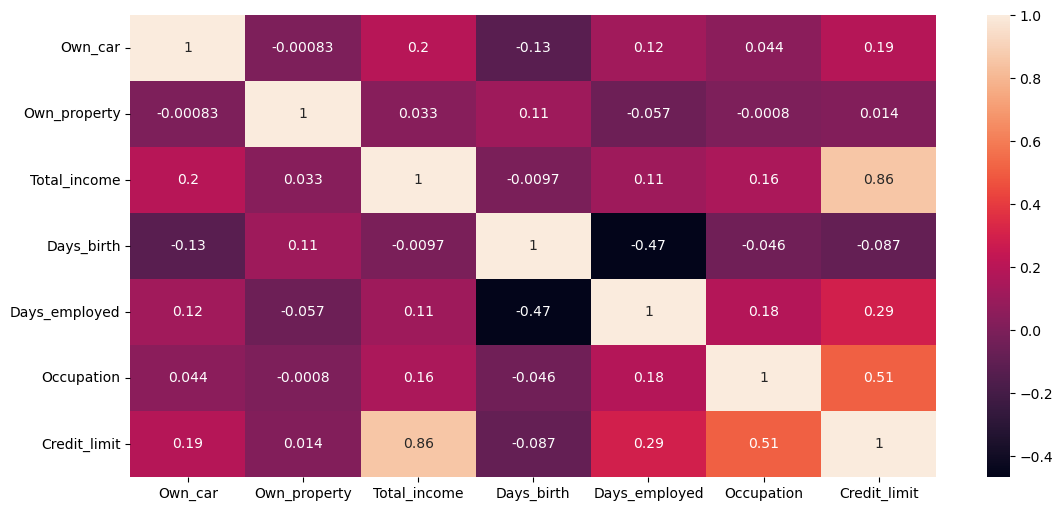

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
sns.heatmap(corr1,annot=True)
plt.show()

In [47]:
new_data.columns

Index(['Own_car', 'Own_property', 'Total_income', 'Days_birth',
       'Days_employed', 'Occupation', 'Credit_limit'],
      dtype='object')

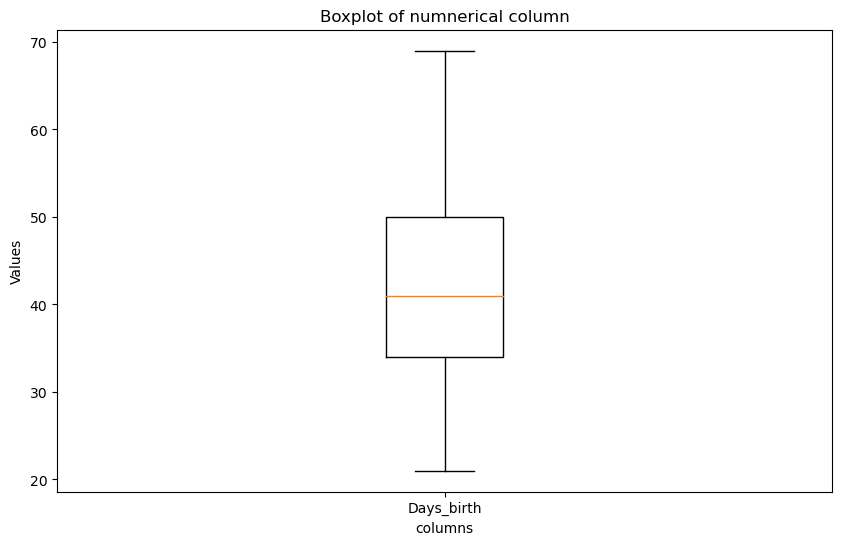

In [48]:
plt.figure(figsize=(10,6))
data_to_plot = [new_data['Days_birth']]
column_name = ['Days_birth']
plt.boxplot(data_to_plot, labels=column_name)

plt.title('Boxplot of numnerical column')
plt.xlabel('columns')
plt.ylabel('Values')
plt.show()

In [49]:
new_data = new_data[new_data['Days_employed']>0]

In [50]:
new_data = new_data[new_data['Total_income']<1500000]

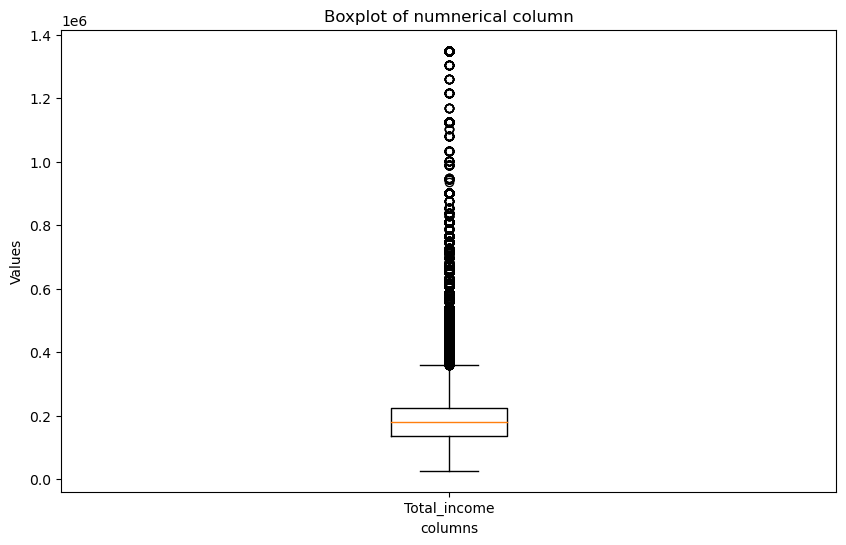

In [51]:
plt.figure(figsize=(10,6))
data_to_plot = [new_data['Total_income']]
column_name = ['Total_income']
plt.boxplot(data_to_plot, labels=column_name)

plt.title('Boxplot of numnerical column')
plt.xlabel('columns')
plt.ylabel('Values')
plt.show()

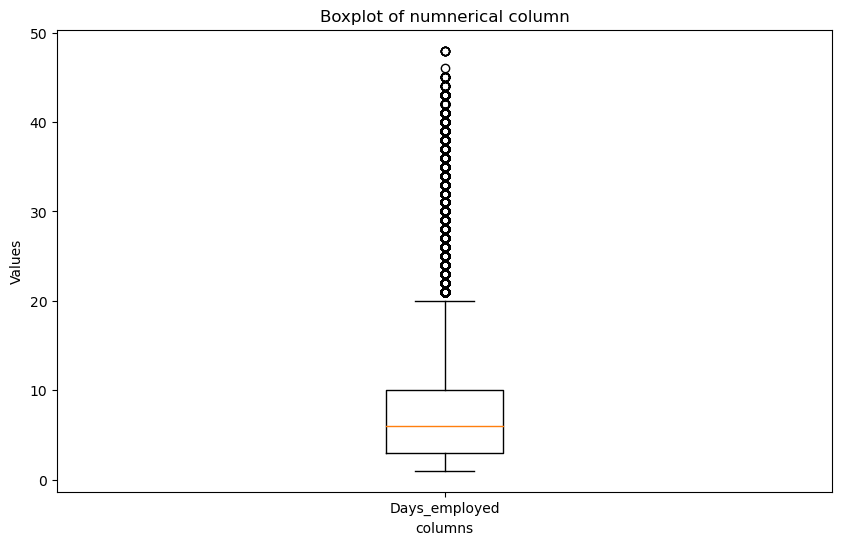

In [52]:
plt.figure(figsize=(10,6))
data_to_plot = [new_data['Days_employed']]
column_name = ['Days_employed']
plt.boxplot(data_to_plot, labels=column_name)

plt.title('Boxplot of numnerical column')
plt.xlabel('columns')
plt.ylabel('Values')
plt.show()

In [53]:
new_data.to_csv('fixed.csv')

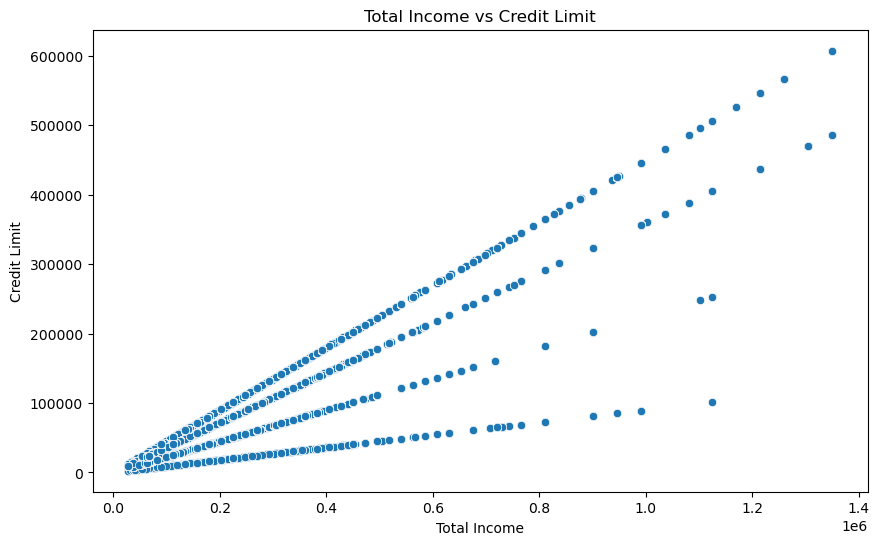

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_data, x='Total_income', y='Credit_limit')
plt.title('Total Income vs Credit Limit')
plt.xlabel('Total Income')
plt.ylabel('Credit Limit')
plt.show()


In [55]:
x=new_data.drop('Credit_limit',axis=1)
y=new_data['Credit_limit']

In [56]:
new_data.shape

(874233, 7)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
ypred=lr.predict(x_test)

In [61]:
from sklearn import metrics

In [62]:
score1=metrics.r2_score(y_test,ypred)

In [63]:
score1

0.8978056458139063

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
gr = GradientBoostingRegressor(n_estimators=20,learning_rate=0.1,max_depth=2,random_state=42)  
gr.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=20, random_state=42)

In [66]:
ypred1 = gr.predict(x_test)

In [67]:
score2=metrics.r2_score(y_test,ypred1)

In [68]:
score2

0.8834894518980356

In [69]:
from sklearn.ensemble import RandomForestRegressor 

In [70]:
rf = RandomForestRegressor(n_estimators=100,max_depth=3,min_samples_split=2,min_samples_leaf=1,n_jobs=-1)  
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, n_jobs=-1)

In [71]:
ypred2 = rf.predict(x_test)

In [72]:
score3 = metrics.r2_score(y_test,ypred2)

In [73]:
score3

0.851929194809561

In [74]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
ypred3 = xgb.predict(x_test)

In [76]:
score3 = metrics.r2_score(y_test,ypred3)

In [77]:
score3

0.9980078154936154

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Creating a simple neural network model
model = Sequential([
    Dense(10, activation='relu', input_shape=(x_train.shape[1],)),  # Adjusted input shape
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model using mini-batch gradient descent
batch_size = 10
num_epochs = 5

# Train the model using mini-batch gradient descent
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Epoch 1/5
24874/69939 [=========>....................] - ETA: 1:10 - loss: 582062976.0000

In [81]:
y_pred = model.predict(x_test)
score2=metrics.r2_score(y_test,y_pred)
print("R2 Score:", score2)

5464/5464 [==============================] - 6s 1ms/step
R2 Score: 0.7814923761697963


In [ ]:
n==

In [ ]:
import joblib

In [ ]:
joblib.dump(lr,'credit_approval_prediction')

In [ ]:
model = joblib.load('credit_approval_prediction')

In [ ]:
data = {'Own_car':1,
        'Own_property':1,
        'Total_income':180000,
        'Days_birth':50,
        'Days_employed':12,
        'Occupation':3}
df = pd.DataFrame(data,index=[0])
df

In [ ]:
model.predict(df)

In [ ]:
s1 =  metrics.mean_absolute_error(y_test, ypred)
s2 =  metrics.mean_absolute_error(y_test, ypred1)
s3 =  metrics.mean_absolute_error(y_test, ypred2)

In [ ]:
s1,s2,s3